In [1]:
import pickle
import copy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from experiments import *
from utils import *

In [2]:
def plot_perf_lines(table_avg, table_std, title, xlabel, ylabel, ylim, error_bar=False):

    for method, values in table_avg.items():
        x = np.array(list(values.keys()))
        y = np.array(list(values.values()))
        s = np.array(list(table_std[method].values()))
        if error_bar: plt.errorbar(x, y, yerr=s, label=method) # , fmt='-o'
        else: plt.errorbar(x, y, label=method)
       
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(ylim[0], ylim[1])
    plt.title(title)
    plt.legend()
    plt.grid(alpha=.3)
    plt.show()

In [ ]:
table_avg = {}
table_std = {}

In [15]:
table_avg['lb'] = {}
table_std['lb'] = {}

with open('data/lb.pickle', 'rb') as handle:
    data = pickle.load(handle)

scenarios = lb_scenarios
chosen_scenarios = list(scenarios.keys())
    
scenarios_position, subscenarios_position = prepare_data(chosen_scenarios, scenarios, data)
scores = create_responses(chosen_scenarios, scenarios, data)
        
balance_weights = np.ones(scores.shape[1]) #for scenario in ['mmlu','civil_comments'], some items need to be up/downweighted, for other scenarios not
if 'civil_comments' in chosen_scenarios:
    balance_weights[scenarios_position['civil_comments']] = scores[:,scenarios_position['civil_comments']].max(axis=0)
    #(balance_weights==0).sum(axis=0) verifying that no item had weight 0 (the output should be zero)
    scores[:,scenarios_position['civil_comments']] = (scores[:,scenarios_position['civil_comments']]>0).astype(float)

if 'mmlu' in chosen_scenarios:
    N = len(scenarios_position['mmlu'])
    n_sub = len(scenarios['mmlu'])
    for sub in scenarios['mmlu']:
        n_i = len(subscenarios_position['mmlu'][sub])
        balance_weights[subscenarios_position['mmlu'][sub]] = N/(n_sub*n_i)
scores = balance_weights*scores

In [16]:
6*100/28659

0.020935831675913327

In [17]:
scores.shape

(395, 28659)

In [18]:
number_items = [10,25,50,75,100,150]
acc = np.vstack([scores[:,scenarios_position[scenario]].mean(axis=1) for scenario in chosen_scenarios])
acc = acc[:,set_of_rows[0]]

In [19]:
acc.shape

(6, 79)

In [20]:
table_avg = {}
table_std = {}

for s,scenario in enumerate(chosen_scenarios):
    table_avg[scenario]= {}
    table_std[scenario]= {}
        
    for method in methods:
        table_avg[scenario][method]= {}
        table_std[scenario][method]= {}

        for number_item in number_items:
            acc_hat = np.array([accs_full[model][number_item][method][scenario] for model in models])
            out = np.array([np.abs(acc[s]-acc_hat[:,i]) for i in range(acc_hat.shape[1])]).mean(axis=0)
            table_avg[scenario][method][number_item] = np.round((100*out.mean()),2)
            table_std[scenario][method][number_item] = np.round((100*out.std()),2)

In [21]:
pd.DataFrame(table_avg['mmlu'])

,random_naive,anchor_naive,anchor-irt_naive,random_pirt,anchor_pirt,anchor-irt_pirt
10,13.62,5.98,14.87,6.86,7.34,6.88
25,8.00,4.75,11.84,4.10,3.65,3.85
50,5.44,3.97,8.96,2.62,2.33,2.52
75,3.99,3.85,10.48,2.10,2.01,2.07
100,3.46,3.67,6.08,2.15,1.79,1.87
150,3.05,3.56,3.03,1.69,1.63,1.75


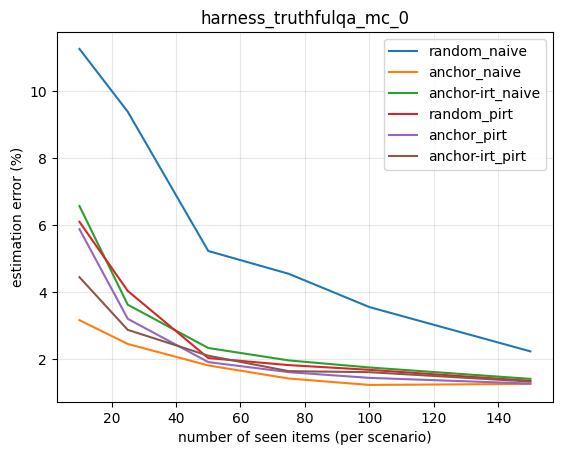

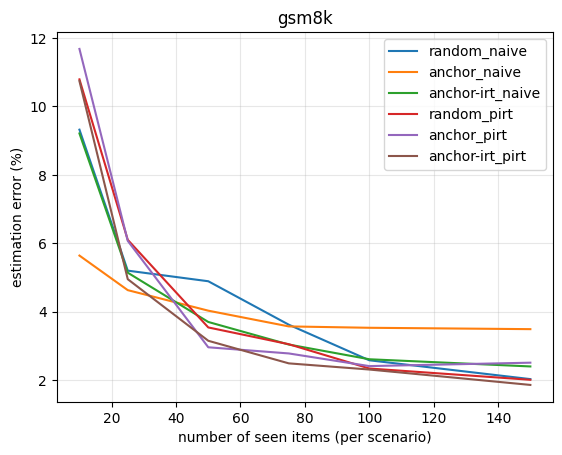

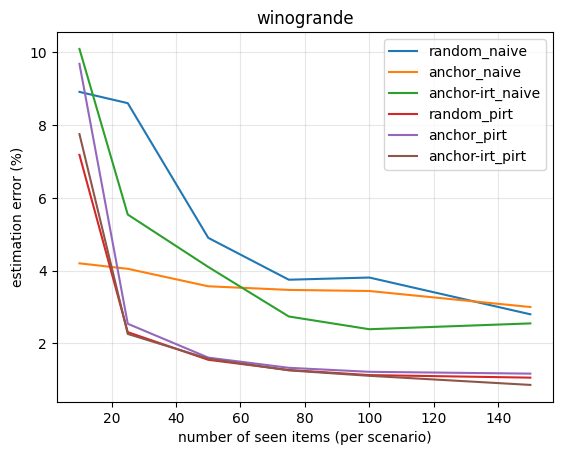

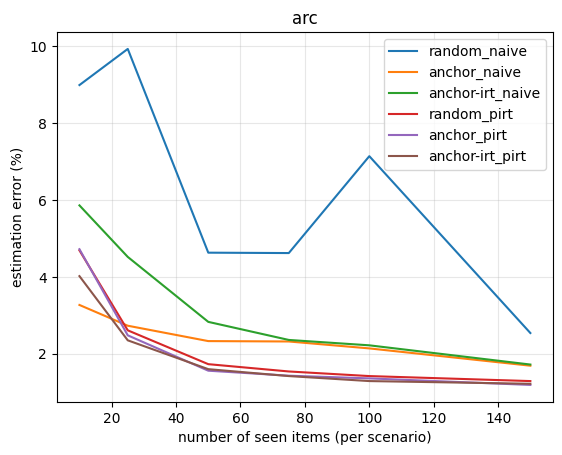

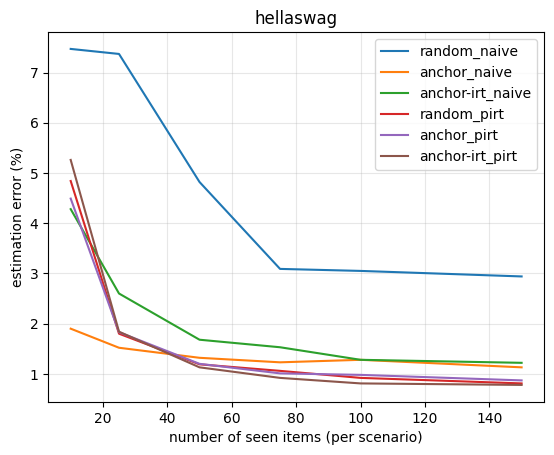

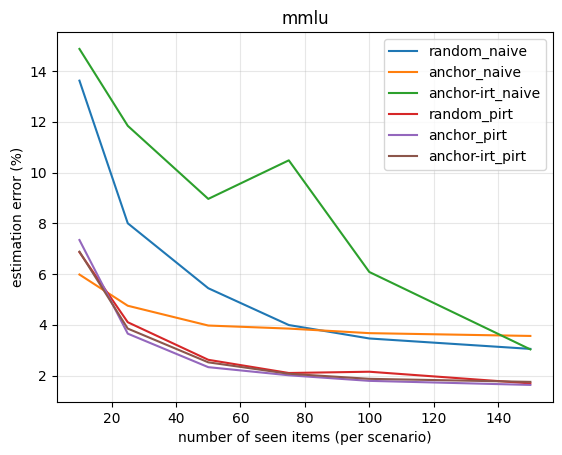

In [22]:
for s,scenario in enumerate(chosen_scenarios):
    pd.DataFrame(pd.DataFrame(table_avg[scenario])).plot()
    plt.grid(alpha=.3)
    plt.title(scenario)
    plt.ylabel('estimation error (%)')
    plt.xlabel('number of seen items (per scenario)')
    plt.show()

In [31]:
table_avg = {}
table_std = {}

for method in methods:
    table_avg[method]= {}
    table_std[method]= {}

    for number_item in number_items:
        acc_hat = np.array([[accs_full[model][number_item][method][scenario] for model in models] for scenario in chosen_scenarios])
        out = np.abs(acc.mean(axis=0)-np.array([[acc_hat[s,:,i] for s,_ in enumerate(chosen_scenarios)] for i in range(acc_hat.shape[2])]).mean(axis=1)).mean(axis=0)
        table_avg[method][number_item] = (out).mean()
        table_std[method][number_item] = (out).std()

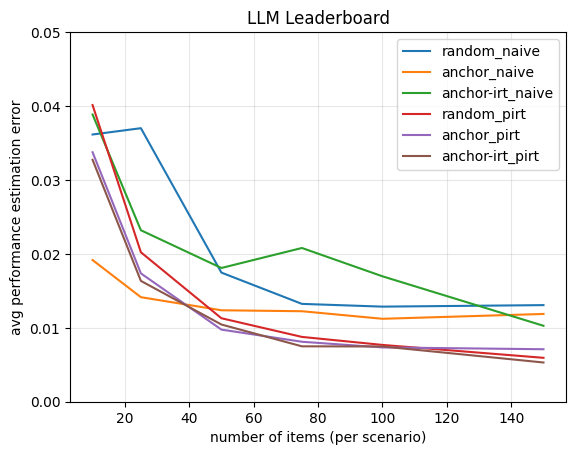

In [50]:
plot_perf_lines(table_avg, table_std,
                title='LLM Leaderboard',
                xlabel='number of items (per scenario)',
                ylabel='avg performance estimation error', ylim=(0,.05))

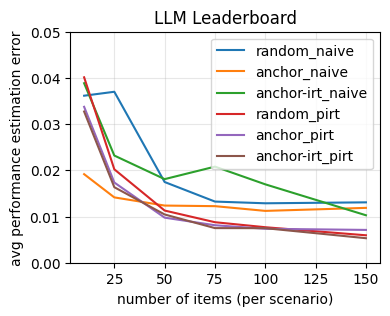

In [38]:
import matplotlib.pyplot as plt

# Creating the plot
plt.figure(figsize=(4, 3))

for method, values in table_avg.items():
    x = np.array(list(values.keys()))
    y = np.array(list(values.values()))
    s = np.array(list(table_std[method].values()))
    plt.errorbar(x, y, label=method)
    plt.ylim(0,.05)
    #plt.plot(x, y, label=method)
    #plt.fill_between(x, y-s, y+s, alpha=.2, label=method)

plt.xlabel('number of items (per scenario)')
plt.ylabel('avg performance estimation error')
plt.title('LLM Leaderboard')
plt.legend()
plt.grid(alpha=.3)
plt.show()


In [ ]:
table_avg['lb'] = {}
table_std['lb'] = {}

with open('data/lb.pickle', 'rb') as handle:
    data = pickle.load(handle)

scenarios = lb_scenarios
chosen_scenarios = list(scenarios.keys())
    
scenarios_position, subscenarios_position = prepare_data(chosen_scenarios, scenarios, data)
scores = create_responses(chosen_scenarios, scenarios, data)
        
balance_weights = np.ones(scores.shape[1]) #for scenario in ['mmlu','civil_comments'], some items need to be up/downweighted, for other scenarios not
if 'civil_comments' in chosen_scenarios:
    balance_weights[scenarios_position['civil_comments']] = scores[:,scenarios_position['civil_comments']].max(axis=0)
    #(balance_weights==0).sum(axis=0) verifying that no item had weight 0 (the output should be zero)
    scores[:,scenarios_position['civil_comments']] = (scores[:,scenarios_position['civil_comments']]>0).astype(float)

if 'mmlu' in chosen_scenarios:
    N = len(scenarios_position['mmlu'])
    n_sub = len(scenarios['mmlu'])
    for sub in scenarios['mmlu']:
        n_i = len(subscenarios_position['mmlu'][sub])
        balance_weights[subscenarios_position['mmlu'][sub]] = N/(n_sub*n_i)
scores = balance_weights*scores

In [25]:
table_std

{'random_naive': {10: 1.67, 25: 1.33, 50: 0.7, 75: 0.57, 100: 0.52, 150: 0.42},
 'anchor_naive': {10: 1.33, 25: 1.1, 50: 0.91, 75: 0.98, 100: 0.95, 150: 0.91},
 'anchor-irt_naive': {10: 1.83,
  25: 0.96,
  50: 0.65,
  75: 0.61,
  100: 0.68,
  150: 0.51},
 'random_pirt': {10: 2.04, 25: 0.9, 50: 0.54, 75: 0.43, 100: 0.36, 150: 0.38},
 'anchor_pirt': {10: 2.08, 25: 0.76, 50: 0.65, 75: 0.45, 100: 0.57, 150: 0.54},
 'anchor-irt_pirt': {10: 1.88,
  25: 0.76,
  50: 0.42,
  75: 0.43,
  100: 0.43,
  150: 0.28}}

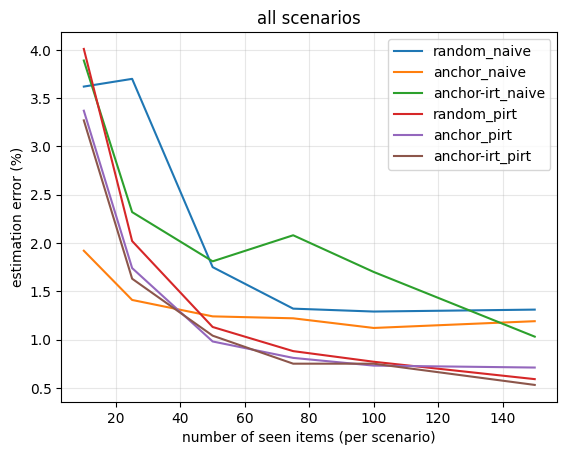

In [137]:
pd.DataFrame(table_avg).plot()
plt.grid(alpha=.3)
plt.title('all scenarios')
plt.ylabel('estimation error (%)')
plt.xlabel('number of seen items (per scenario)')
plt.show()

In [138]:
table_avg = {}
table_std = {}

for s,scenario in enumerate(chosen_scenarios):
    table_avg[scenario]= {}
    table_std[scenario]= {}
        
    for method in methods:
        table_avg[scenario][method]= {}
        table_std[scenario][method]= {}

        for number_item in number_items:
            acc_hat = np.array([accs_full[model][number_item][method][scenario] for model in models])
            out = np.array([stats.spearmanr(acc[s], acc_hat[:,i]).statistic for i in range(acc_hat.shape[1])]).mean(axis=0)
            table_avg[scenario][method][number_item] = np.round((100*out),2)
            table_std[scenario][method][number_item] = np.round((100*out),2)

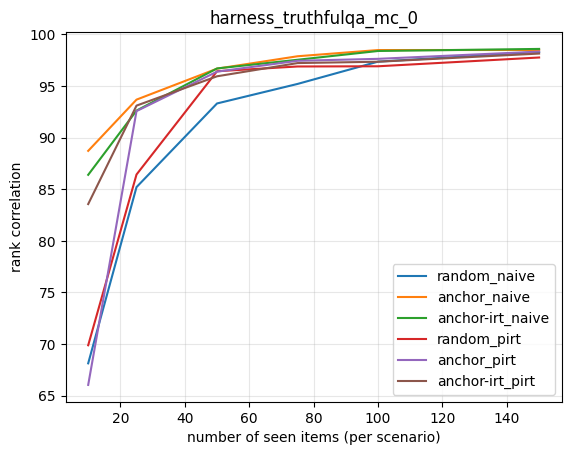

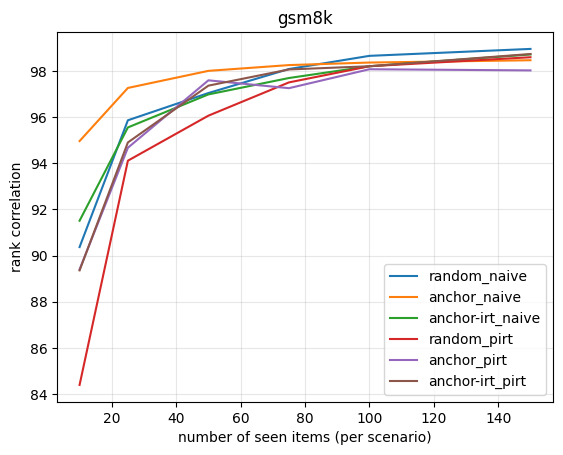

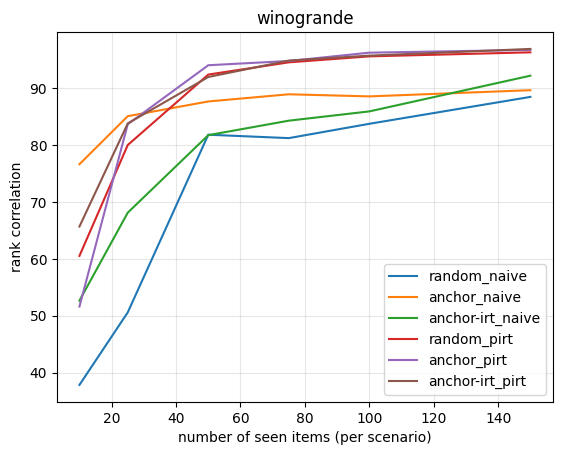

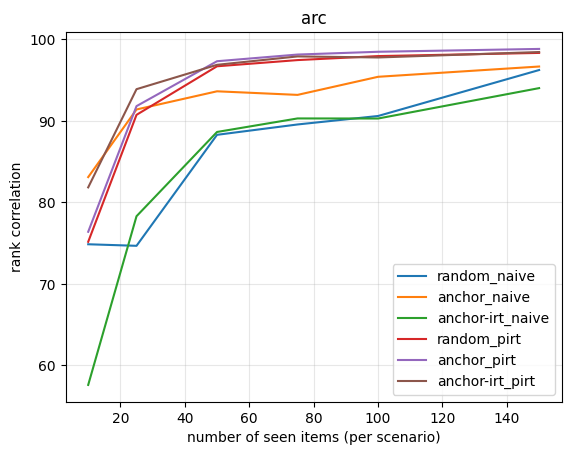

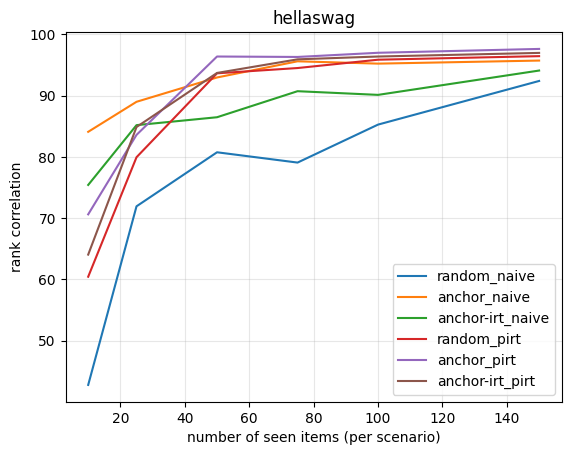

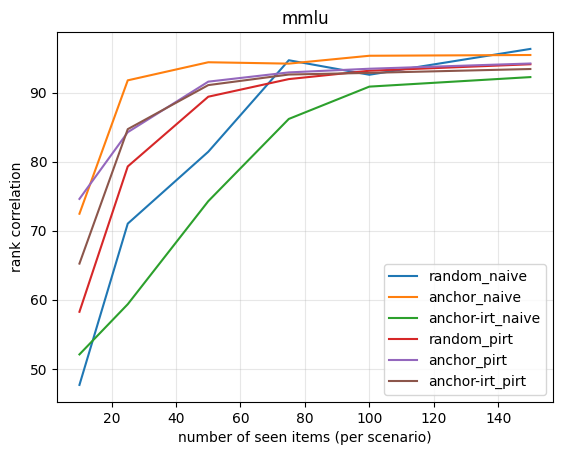

In [139]:
for s,scenario in enumerate(chosen_scenarios):
    pd.DataFrame(pd.DataFrame(table_avg[scenario])).plot()
    plt.grid(alpha=.3)
    plt.title(scenario)
    plt.ylabel('rank correlation')
    plt.xlabel('number of seen items (per scenario)')
    plt.show()

In [140]:
table_avg = {}
table_std = {}

for method in methods:
    table_avg[method]= {}
    table_std[method]= {}

    for number_item in number_items:
        acc_hat = np.array([[accs_full[model][number_item][method][scenario] for model in models] for scenario in chosen_scenarios])
        out = np.array([[stats.spearmanr(acc[s], acc_hat[s,:,i]).statistic for s,_ in enumerate(chosen_scenarios)] for i in range(acc_hat.shape[2])]).mean(axis=0)
        table_avg[method][number_item] = np.round((100*out).mean(),2)
        table_std[method][number_item] = np.round((100*out).std(),2)

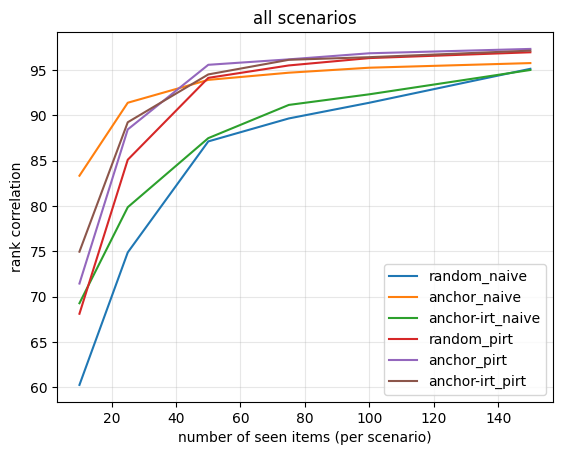

In [49]:
pd.DataFrame(table_avg).plot()
plt.grid(alpha=.3)
plt.title('all scenarios')
plt.ylabel('rank correlation')
plt.xlabel('number of seen items (per scenario)')
plt.show()

In [50]:
table_std

{'random_naive': {10: 18.93,
  25: 13.91,
  50: 6.31,
  75: 7.19,
  100: 5.57,
  150: 3.62},
 'anchor_naive': {10: 7.39,
  25: 3.77,
  50: 3.27,
  75: 3.14,
  100: 3.28,
  150: 2.97},
 'anchor-irt_naive': {10: 15.98,
  25: 12.89,
  50: 8.0,
  75: 5.09,
  100: 4.53,
  150: 2.7},
 'random_pirt': {10: 9.41, 25: 5.78, 50: 2.62, 75: 2.01, 100: 1.69, 150: 1.53},
 'anchor_pirt': {10: 11.4, 25: 4.67, 50: 2.11, 75: 1.78, 100: 1.66, 150: 1.52},
 'anchor-irt_pirt': {10: 10.23,
  25: 4.79,
  50: 2.4,
  75: 1.92,
  100: 1.78,
  150: 1.79}}